# Geometric Transformation on Images
Images may be transformed at two different levels:
* Position
* Intensity

This notebook explores transforming pixels positions.

# Common Code
The following code will be used along the rest of the notebook, please make sure you execute each kernel.

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive
import ipywidgets as widgets

In [16]:
def drawBox(nw, ne, se, sw):
    n0 = [nw[0],ne[0]]
    n1 = [nw[1],ne[1]]
    e0 = [ne[0],se[0]]
    e1 = [ne[1],se[1]]
    s0 = [se[0],sw[0]]
    s1 = [se[1],sw[1]]
    w0 = [sw[0],nw[0]]
    w1 = [sw[1],nw[1]]
    
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(n0, n1, 'ro-')
    plt.plot(e0, e1, 'go-')
    plt.plot(s0, s1, 'bo-')
    plt.plot(w0, w1, 'ko-')
    plt.grid()
    plt.show()

def degToRad(deg):
    return deg*np.pi/180

def toEuclideanCoordinates(p):
    p[0] = p[0]/p[2]
    p[1] = p[1]/p[2]
    
    return p

# Image Position Transformations
These family of transformations do not modify the intensity value of the pixels, but instead move them around. Broadly, we can divide these transformation in different categories:
* Euclidean transformation
* Similitud transformation
* Affine transformation
* Projective transformation

## Euclidean transformation
The euclidean transformation has three degrees of freedom:
* Rotation
* X traslation
* Y traslation

\begin{equation}
\mathbf{H} = \begin{bmatrix}
\cos{\theta} && -\sin{\theta} && t_x\\
\sin{\theta} && \cos{\theta} && t_y\\
0 && 0 && 1\\ 
\end{bmatrix} = \begin{bmatrix}
\mathbf{R}_\theta && \mathbf{\underline{t}}\\
\mathbf{\underline{0}}^T && 1\\ 
\end{bmatrix}
\end{equation}

The euclidean transformation keeps constant:
* lengths
* areas
* angles

In [17]:
def transform(point, T):
    return np.matmul(T, point);

@interact(tx=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True), 
          ty=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True),
          ang=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False))
def t(tx, ty, ang):
    rad = degToRad(ang)
    T = np.float32([[np.cos(rad),np.sin(rad),tx],
                    [-np.sin(rad),np.cos(rad),ty],
                    [0,0,1]])

    
    nw = np.float32([-1,1,1])
    ne = np.float32([1,1,1])
    se = np.float32([1,-1,1])
    sw = np.float32([-1,-1,1])
    
    nwt = transform (nw, T)
    net = transform (ne, T)
    set = transform (se, T)
    swt = transform (sw, T)

    
    drawBox(nwt, net, set, swt)

## Similitude transformation
The similitude transformation has four degrees of freedom:
* Rotation
* X traslation
* Y traslation
* Isotropic scaling

\begin{equation}
\mathbf{H} = \begin{bmatrix}
s\cos{\theta} && -s\sin{\theta} && t_x\\
s\sin{\theta} && s\cos{\theta} && t_y\\
0 && 0 && 1\\ 
\end{bmatrix} = \begin{bmatrix}
s\mathbf{R}_\theta && \mathbf{\underline{t}}\\
\mathbf{\underline{0}}^T && 1\\ 
\end{bmatrix}
\end{equation}

The similitude transformation keeps constant:
* angles

In [19]:
def transform(point, T):
    return np.matmul(T, point);

@interact(tx=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True), 
          ty=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True),
          s=widgets.FloatSlider(min=0,max=4,step=0.1,value=1,continuous_update=False),
          ang=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False))
def t(tx, ty, s, ang):
    rad = degToRad(ang)
    T = np.float32([[s*np.cos(rad),s*np.sin(rad),tx],
                    [-s*np.sin(rad),s*np.cos(rad),ty],
                    [0,0,1]])

    
    nw = np.float32([-1,1,1])
    ne = np.float32([1,1,1])
    se = np.float32([1,-1,1])
    sw = np.float32([-1,-1,1])
    
    nwt = transform (nw, T)
    net = transform (ne, T)
    set = transform (se, T)
    swt = transform (sw, T)

    
    drawBox(nwt, net, set, swt)

An alternative implementation is to build the matrix by multiplying other matrices. This way you can change the order of things!

\begin{equation}
\mathbf{H} = \mathbf{T}\mathbf{R}\mathbf{S}
\end{equation}

The transformations will by applied from right, to left. In the equation above: scale, rotate and finally translate.

Go ahead an reimplement the transformation above by using matrix multiplications.

In [20]:
def transform(point, T):
    return np.matmul(T, point);

@interact(tx=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True), 
          ty=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True),
          s=widgets.FloatSlider(min=0,max=4,step=0.1,value=1,continuous_update=False),
          ang=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False))
def t(tx, ty, s, ang):
    rad = degToRad(ang)
    R = np.float32([[np.cos(rad),np.sin(rad),0],
                    [-np.sin(rad),np.cos(rad),0],
                    [0,0,1]])
    S = np.float32([[s, 0, 0],
                    [0, s, 0],
                    [0, 0, 1]])
    T = np.float32([[1, 0, tx],
                    [0, 1, ty],
                    [0, 0, 1]])
    
    H = np.matmul (T, np.matmul(R, S))

    
    nw = np.float32([-1,1,1])
    ne = np.float32([1,1,1])
    se = np.float32([1,-1,1])
    sw = np.float32([-1,-1,1])
    
    nwt = transform (nw, H)
    net = transform (ne, H)
    set = transform (se, H)
    swt = transform (sw, H)

    
    drawBox(nwt, net, set, swt)

Now change the order so that the transfomations traslates first, scales second and lastly rotate.

In [21]:
def transform(point, T):
    return np.matmul(T, point);

@interact(tx=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True), 
          ty=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True),
          s=widgets.FloatSlider(min=0,max=4,step=0.1,value=1,continuous_update=False),
          ang=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False))
def t(tx, ty, s, ang):
    rad = degToRad(ang)
    R = np.float32([[np.cos(rad),np.sin(rad),0],
                    [-np.sin(rad),np.cos(rad),0],
                    [0,0,1]])
    S = np.float32([[s, 0, 0],
                    [0, s, 0],
                    [0, 0, 1]])
    T = np.float32([[1, 0, tx],
                    [0, 1, ty],
                    [0, 0, 1]])
    
    H = np.matmul (R, np.matmul(S, T))

    
    nw = np.float32([-1,1,1])
    ne = np.float32([1,1,1])
    se = np.float32([1,-1,1])
    sw = np.float32([-1,-1,1])
    
    nwt = transform (nw, H)
    net = transform (ne, H)
    set = transform (se, H)
    swt = transform (sw, H)

    
    drawBox(nwt, net, set, swt)

## Affine transformation
The similitude transformation has six degrees of freedom:
* Rotation in 2 angles
* X traslation
* Y traslation
* Anisotropic scaling in X
* Anisotropic scaling in Y

\begin{equation}
\mathbf{H} = \begin{bmatrix}
a_{11} && a_{12} && t_x\\
a_{21} && a_{22} && t_y\\
0 && 0 && 1\\ 
\end{bmatrix} = \begin{bmatrix}
\mathbf{A} && \mathbf{\underline{t}}\\
\mathbf{\underline{0}}^T && 1\\ 
\end{bmatrix}
\end{equation}
where
\begin{equation}
\mathbf{A} = \mathbf{R}_\theta \mathbf{R}_{-\Phi} \mathbf{D}_{\lambda_1,\lambda_2} \mathbf{R}_\Phi
\end{equation}
The affine transformation keeps constant:
* Parallelism between lines
* Lengths ratio
* Areas ratio

In [22]:
def transform(point, T):
    return np.matmul(T, point);

@interact(tx=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True), 
          ty=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True),
          sx=widgets.FloatSlider(min=0,max=2,step=0.1,value=1,continuous_update=False),
          sy=widgets.FloatSlider(min=0,max=2,step=0.1,value=1,continuous_update=False),
          theta=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False),
          phi=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False),)
def t(tx, ty, sx, sy, theta, phi):
    rtheta = degToRad(theta)
    rphi = degToRad(phi)
    
    Rtheta = np.float32([[np.cos(rtheta),np.sin(rtheta)],
                         [-np.sin(rtheta),np.cos(rtheta)]])
    Rphi = np.float32([[np.cos(rphi),np.sin(rphi)],
                    [-np.sin(rphi),np.cos(rphi)]])
    Rmphi = np.float32([[np.cos(-rphi),np.sin(-rphi)],
                    [-np.sin(-rphi),np.cos(-rphi)]])
    S = np.float32([[sx, 0],
                    [0, sy]])
    A = np.matmul(Rtheta, np.matmul(Rmphi,np.matmul(S, Rphi)))

    T = np.zeros((3,3))
    T[0:2,0:2] = A
    T[0,2] = tx
    T[1,2] = ty
    
    nw = np.float32([-1,1,1])
    ne = np.float32([1,1,1])
    se = np.float32([1,-1,1])
    sw = np.float32([-1,-1,1])
    
    nwt = transform (nw, T)
    net = transform (ne, T)
    set = transform (se, T)
    swt = transform (sw, T)
    
    drawBox(nwt, net, set, swt)

## Projective transformation
The projective transformation has eight degrees of freedom:
* Rotation in 2 angles
* X traslation
* Y traslation
* Anisotropic scaling in X
* Anisotropic scaling in Y
* Normalization from homogeneous to euclidean coordinates

\begin{equation}
\mathbf{H} = \begin{bmatrix}
a_{11} && a_{12} && t_x\\
a_{21} && a_{22} && t_y\\
v_1 && v_2 && 1\\ 
\end{bmatrix} = \begin{bmatrix}
\mathbf{A} && \mathbf{\underline{t}}\\
\mathbf{\underline{v}}^T && 1\\ 
\end{bmatrix}
\end{equation}
where
\begin{equation}
\mathbf{A} = \mathbf{R}_\theta \mathbf{R}_{-\Phi} \mathbf{D}_{\lambda_1,\lambda_2} \mathbf{R}_\Phi
\end{equation}
The projective transformation keeps constant:
* Length ratio between four colinear points

In [8]:
def transform(point, T):
    return np.matmul(T, point);

@interact(tx=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True), 
          ty=widgets.IntSlider(min=-4,max=4,step=1,value=0,continuous_update=True),
          sx=widgets.FloatSlider(min=0,max=2,step=0.1,value=1,continuous_update=False),
          sy=widgets.FloatSlider(min=0,max=2,step=0.1,value=1,continuous_update=False),
          theta=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False),
          phi=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False),
          p1=widgets.FloatSlider(min=-1,max=1,step=0.1,value=0,continuous_update=False),
          p2=widgets.FloatSlider(min=-1,max=1,step=0.1,value=0,continuous_update=False),)
def t(tx, ty, sx, sy, theta, phi, p1, p2):
    rtheta = degToRad(theta)
    rphi = degToRad(phi)
    
    Rtheta = np.float32([[np.cos(rtheta),np.sin(rtheta)],
                         [-np.sin(rtheta),np.cos(rtheta)]])
    Rphi = np.float32([[np.cos(rphi),np.sin(rphi)],
                    [-np.sin(rphi),np.cos(rphi)]])
    Rmphi = np.float32([[np.cos(-rphi),np.sin(-rphi)],
                    [-np.sin(-rphi),np.cos(-rphi)]])
    S = np.float32([[sx, 0],
                    [0, sy]])
    A = np.matmul(Rtheta, np.matmul(Rmphi,np.matmul(S, Rphi)))

    T = np.zeros((3,3))
    T[0:2,0:2] = A
    T[0,2] = tx
    T[1,2] = ty
    T[2,0] = p1
    T[2,1] = p2
    T[2,2] = 1
    
    nw = np.float32([-1,1,1])
    ne = np.float32([1,1,1])
    se = np.float32([1,-1,1])
    sw = np.float32([-1,-1,1])
    
    nwt = transform (nw, T)
    net = transform (ne, T)
    set = transform (se, T)
    swt = transform (sw, T)
    
    nwt = toEuclideanCoordinates(nwt)
    net = toEuclideanCoordinates(net)
    set = toEuclideanCoordinates(set)
    swt = toEuclideanCoordinates(swt)
    
    print(nwt)

    
    drawBox(nwt, net, set, swt)

## Geometric transform on Images
Now lets try to apply a scaling on an image. Try to apply the transformation pixel by pixel.

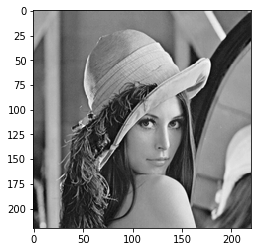

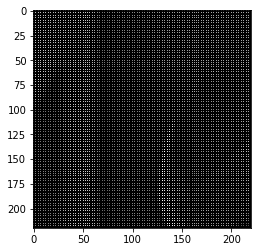

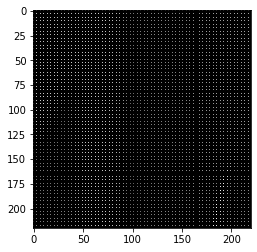

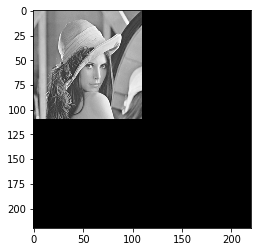

In [11]:
@interact(s=widgets.FloatSlider(min=0,max=10,step=0.5,value=1,continuous_update=False))
def t(s):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    rows,cols = img.shape

    print ("Scaling to " + str(s))
    
    S = np.float32([[s, 0],[0,s]])
    
    dst = np.zeros((rows,cols))
    
    for row in range(0,rows):
        for col in range(0,cols):
            srcpt = np.float32([row, col])
            dstpt = np.matmul(S,srcpt)
            if dstpt[0] < rows and dstpt[1] < cols:
                dst[int(dstpt[0]),int(dstpt[1])] = img[int(srcpt[0]),int(srcpt[1])]
    
    plt.imshow(dst, cmap='gray')

Did you notice what happened? Due to our discrete nature there is not enough information to fill in all the output image. A better implementation walks through the **output** pixels, and find the **input** donors using the inverse transformation. Interpolation is also used to get more accurate results.

Let's see how to implement an affine transform using OpenCV

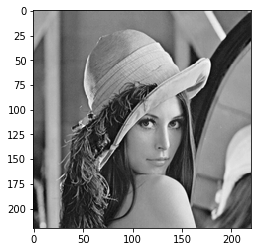

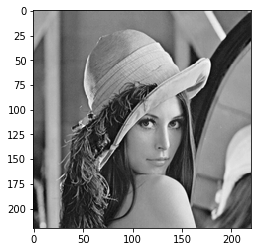

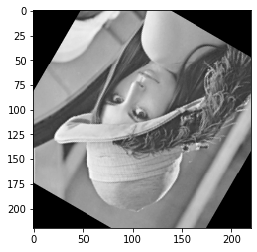

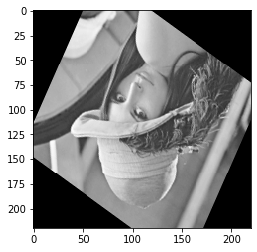

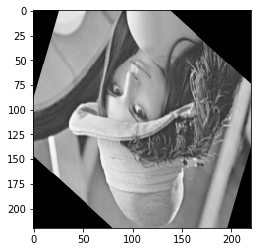

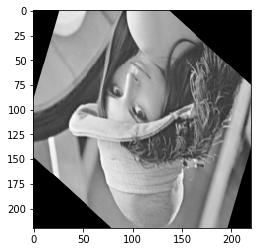

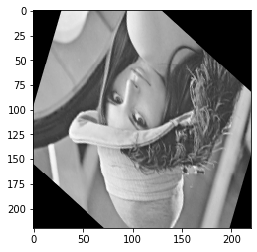

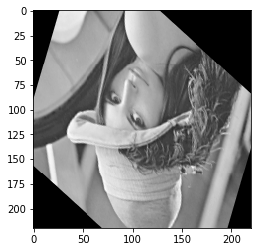

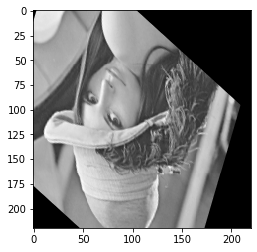

In [12]:
@interact(tx=widgets.IntSlider(min=-50,max=50,step=1,value=0,continuous_update=True), 
          ty=widgets.IntSlider(min=-50,max=50,step=1,value=0,continuous_update=True),
          sx=widgets.FloatSlider(min=0,max=2,step=0.1,value=1,continuous_update=False),
          sy=widgets.FloatSlider(min=0,max=2,step=0.1,value=1,continuous_update=False),
          theta=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False),
          phi=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False),)
def t(tx, ty, sx, sy, theta, phi):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    rows,cols = img.shape

    rtheta = degToRad(theta)
    rphi = degToRad(phi)
    
    center = np.float32([[1, 0, -cols/2],
                       [0, 1, -rows/2],
                       [0, 0, 1]])
    origin = np.float32([[1, 0, cols/2],
                       [0, 1, rows/2],
                        [0, 0, 1]])
    
    Rtheta = np.float32([[np.cos(rtheta),np.sin(rtheta), 0],
                        [-np.sin(rtheta),np.cos(rtheta), 0],
                        [0, 0, 1]])
    Rphi = np.float32([[np.cos(rphi),np.sin(rphi), 0],
                       [-np.sin(rphi),np.cos(rphi), 0],
                       [0, 0, 1]])
    Rmphi = np.float32([[np.cos(-rphi),np.sin(-rphi), 0],
                        [-np.sin(-rphi),np.cos(-rphi), 0],
                        [0, 0, 1]])
    
    S = np.float32([[sx, 0, 0],
                    [0, sy, 0],
                    [0, 0, 1]])
    
    T = np.float32([[1, 0, tx],
                    [0, 1, ty],
                    [0, 0, 1]])
    A = np.matmul(origin, np.matmul(T, np.matmul(Rtheta, np.matmul(Rmphi,np.matmul(S, np.matmul(Rphi,center))))))
    #A = np.matmul(T, np.matmul(Rtheta, np.matmul(Rmphi,np.matmul(S, Rphi))))

    print (A)
    
    dst = cv2.warpAffine(img, A[0:2,0:3], img.shape)
    print(img.shape)
    print(dst.shape)

    plt.imshow(dst, cmap='gray')

Now modify the code above to perform the transformations from the center!

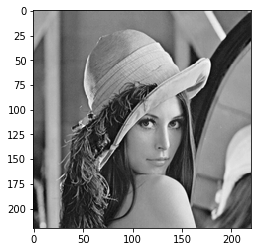

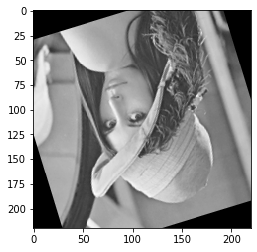

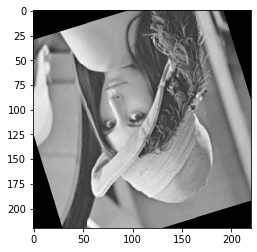

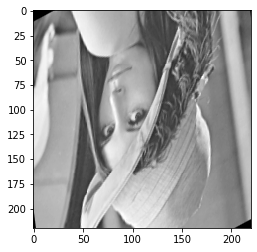

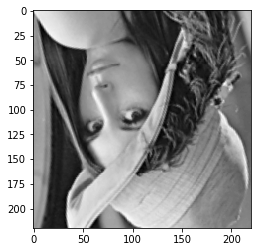

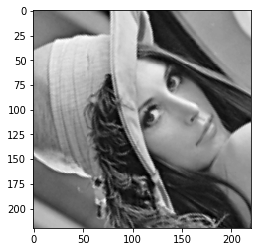

In [27]:
@interact(tx=widgets.IntSlider(min=-50,max=50,step=1,value=0,continuous_update=True), 
          ty=widgets.IntSlider(min=-50,max=50,step=1,value=0,continuous_update=True),
          sx=widgets.FloatSlider(min=0,max=2,step=0.1,value=1,continuous_update=False),
          sy=widgets.FloatSlider(min=0,max=2,step=0.1,value=1,continuous_update=False),
          theta=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False),
          phi=widgets.IntSlider(min=0,max=360,step=1,value=0,continuous_update=False),)
def t(tx, ty, sx, sy, theta, phi):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    rows,cols = img.shape

    rtheta = degToRad(theta)
    rphi = degToRad(phi)
    
    Rtheta = np.float32([[np.cos(rtheta),np.sin(rtheta), 0],
                         [-np.sin(rtheta),np.cos(rtheta), 0],
                         [0, 0, 1]])
    Rphi = np.float32([[np.cos(rphi),np.sin(rphi), 0],
                    [-np.sin(rphi),np.cos(rphi), 0],
                      [0, 0, 1]])
    Rmphi = np.float32([[np.cos(-rphi),np.sin(-rphi), 0],
                    [-np.sin(-rphi),np.cos(-rphi), 0],
                       [0, 0, 1]])

    S = np.float32([[sx, 0, 0],
                    [0, sy, 0],
                    [0, 0, 1]])
    
    center = np.float32([[1, 0, -cols/2],
                    [0, 1, -rows/2],
                    [0, 0, 1]])
    
    decenter = np.float32([[1, 0, cols/2],
                    [0, 1, rows/2],
                    [0, 0, 1]])
    
    T = np.float32([[1, 0, tx],
                    [0, 1, ty],
                    [0, 0, 1]])
    A = np.matmul(T, np.matmul(decenter, np.matmul(Rtheta, np.matmul(Rmphi,np.matmul(S, np.matmul(Rphi, center))))))

    dst = cv2.warpAffine(img, A[0:2,0:3], img.shape)

    plt.imshow(dst, cmap='gray')